# Testing plotnine on Chapter 5 of Healy's Data Visualization
[link](https://socviz.co/workgeoms.html) to chapter

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine

%matplotlib inline

In [2]:
gss_sm = pd.read_feather('data/gss_sm.f')
gss_sm['religion'] = gss_sm['religion'].cat.add_categories(['NA'])
gss_sm['religion'] = gss_sm['religion'].fillna('NA')
# TODO(jkg): how to improve this?
gss_sm['cnt'] = 1
rel_by_region = gss_sm.groupby(['bigregion','religion'])['cnt'].count().reset_index()
rel_by_region['freq'] = rel_by_region.groupby('bigregion')['cnt'].apply(lambda x: x/sum(x))
rel_by_region['pct'] = rel_by_region['freq'].apply(lambda x: round(x*100),1) # this can't be 0 for some unknown reason!

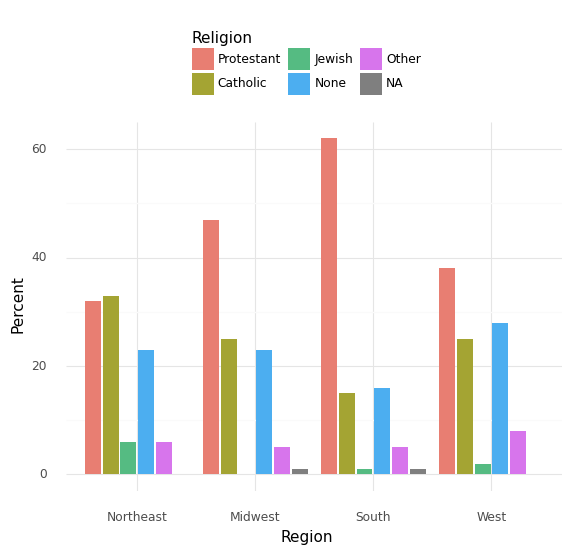

<ggplot: (271804760)>

In [3]:
# 5.2

GGRED   = '#e87e72'
GGGREENISH = '#a4a433' 
GGGREEN = '#55bb82'
GGTEAL = '#4caef0'
GGLIGHTPURPLE = '#d775ec'
GGGRAY = '#7f7f7f'


p = ggplot(rel_by_region, aes(x='bigregion',y='pct',fill='religion'))
p + geom_col(position="dodge2") + scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    ) + labs(x='Region',y='Percent',fill='Religion') + \
    theme_minimal() + theme(legend_position='top')

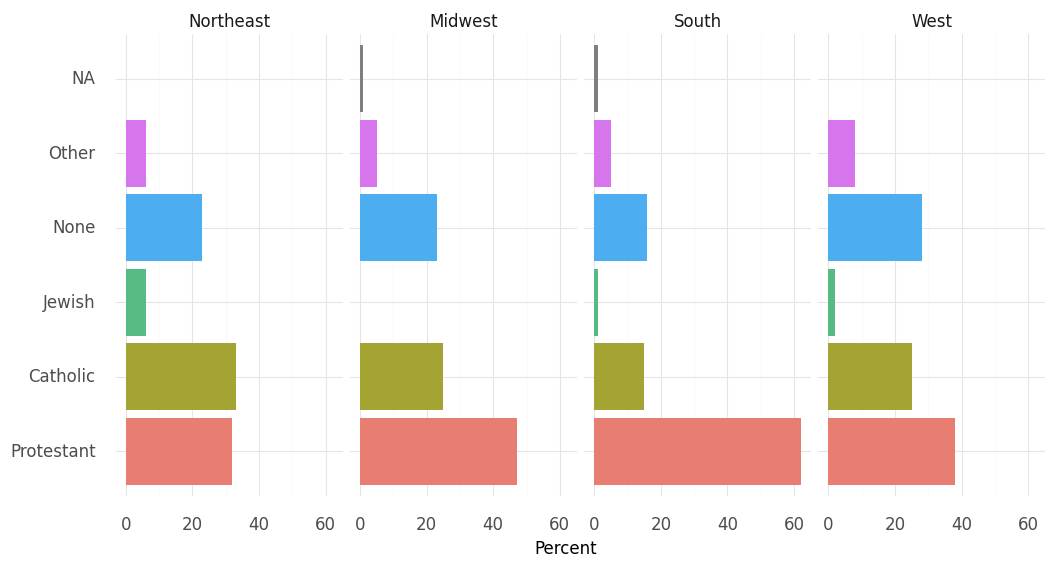

<ggplot: (318869384)>

In [4]:
# 5.3
plotnine.options.figure_size = (12, 6)


p = ggplot(rel_by_region, aes(x='religion',y='pct',fill='religion'))
p + geom_col(position='dodge2') + \
    labs(x=None, y='Percent', fill='Religion') + \
    guides(fill=False) + \
    coord_flip() + \
    facet_grid('~ bigregion') + \
    theme_minimal() + \
    scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    ) + \
    theme(text=element_text(size= 12))

## Continuous Variables by Group or Category

In [5]:
organdata = pd.read_feather('data/organdata.f')
organdata = organdata[organdata['year'].notnull()]
organdata['year'] = pd.to_datetime(organdata['year']).apply(lambda x: x.year).astype(int)

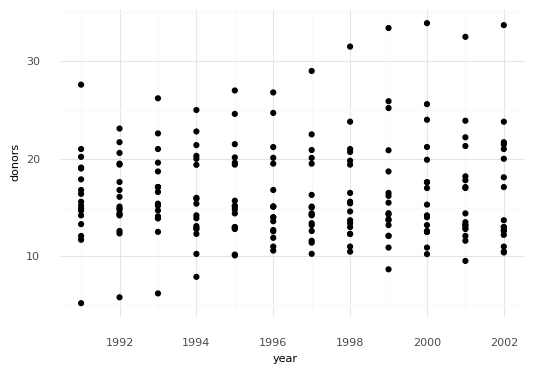

<ggplot: (319150864)>

In [6]:
# 5.4

plotnine.options.figure_size = (6, 4)
p = ggplot(
    data=organdata,
    mapping=aes(x='year',y='donors')
)

p + geom_point() + theme_minimal() + \
    theme(text=element_text(size=8)) + \
    scale_x_continuous(breaks=[1992,1994,1996,1998,2000,2002])

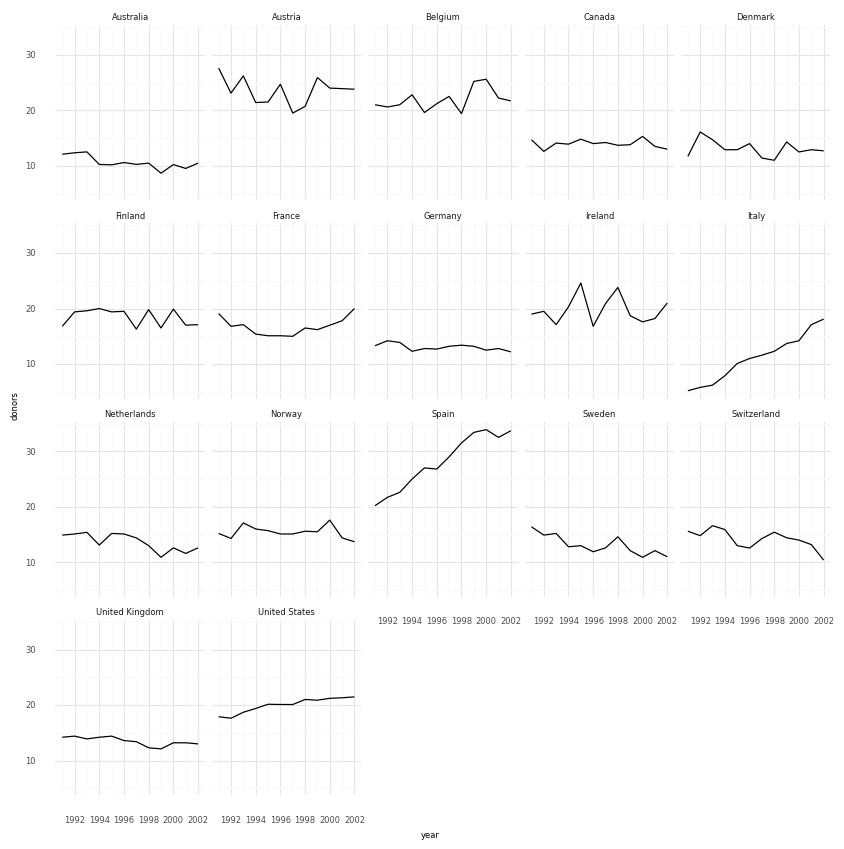

<ggplot: (271804874)>

In [7]:
# 5.5

plotnine.options.figure_size = (10, 10)

p = ggplot(
    data=organdata,
    mapping=aes(x='year',y='donors')
)

p + geom_line(aes(group='country')) + \
    facet_wrap('~country') + \
    theme_minimal() + \
    scale_x_continuous(breaks=[1992,1994,1996,1998,2000,2002]) + \
    theme(text=element_text(size= 6))

## Boxplots

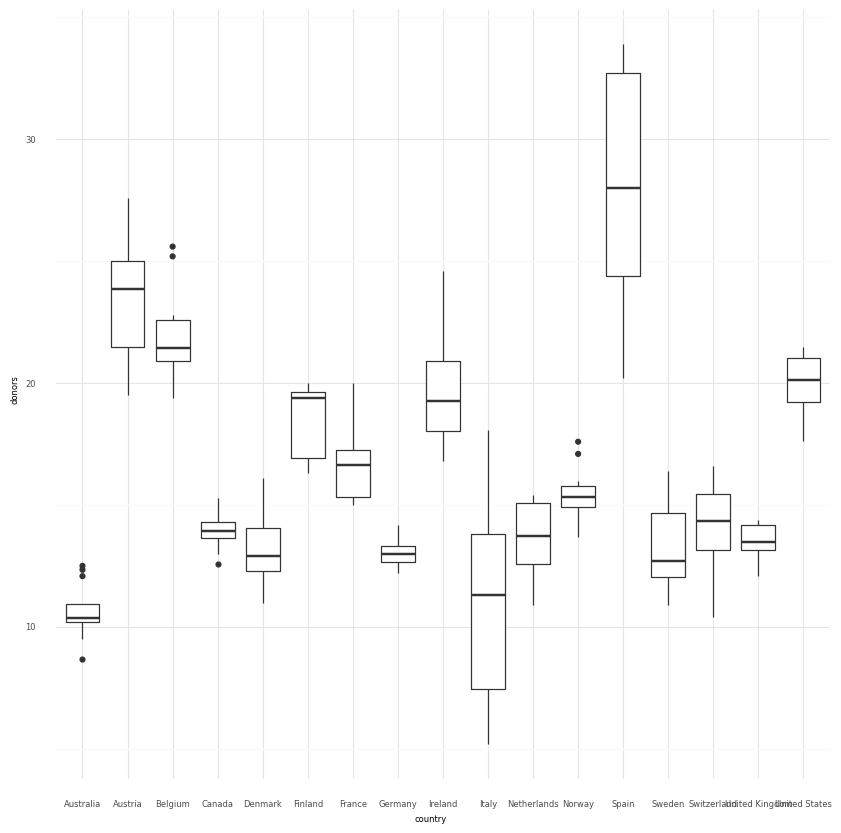

<ggplot: (319338644)>

In [8]:
# 5.6

plotnine.options.figure_size = (10, 10)

p = ggplot(
    data = organdata,
    mapping = aes(x='country', y='donors')
)

p1 = p + geom_boxplot() + theme_minimal() + \
    theme(text=element_text(size= 6))

p1

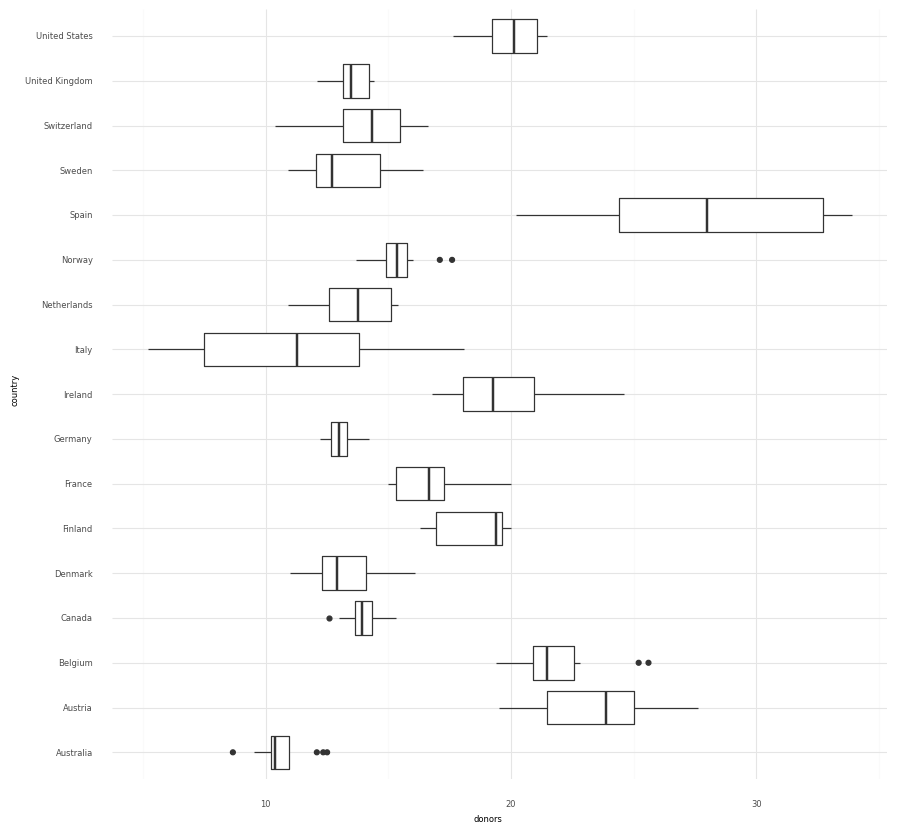

<ggplot: (319338638)>

In [9]:
# 5.7

plotnine.options.figure_size = (6, 6)

p1 + coord_flip()

In [10]:
organdata['country'] = organdata['country'].astype('category')

organdata['country'] = (organdata['country'].cat
                        .reorder_categories(
                            new_categories=organdata.groupby('country')['donors'].mean().sort_values(ascending=True).index.astype(str)
                        ))

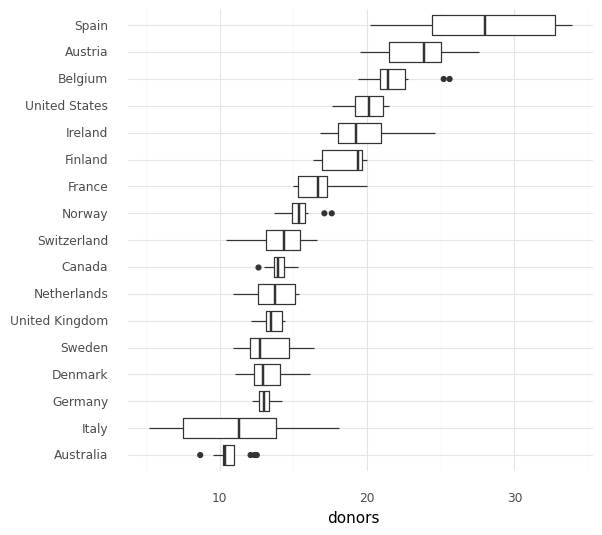

<ggplot: (320370261)>

In [11]:
# 5.8

p = ggplot(
    data = organdata,
    mapping=aes(x='country',y='donors')
)

p + geom_boxplot() + labs(x=None) + coord_flip() + theme_minimal()

In [12]:
organdata['world'] = organdata['world'].fillna('NA')
organdata['world'] = (organdata['world'].astype('category').cat
                      .reorder_categories(
                          new_categories=['Corporatist','Liberal','SocDem','NA'],
                          ordered=True
                      ))

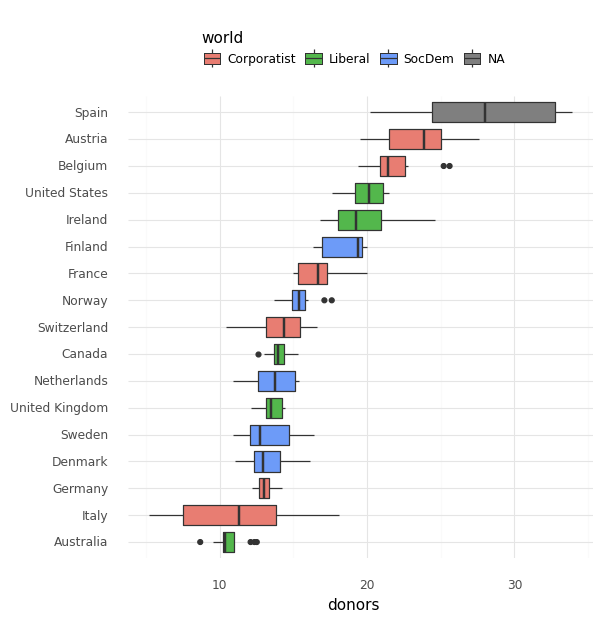

<ggplot: (320637937)>

In [13]:
# 5.9

p = ggplot(
    data = organdata,
    mapping=aes(x='country',y='donors', fill='world')
)

p + geom_boxplot() + \
    labs(x=None) + \
    coord_flip() + \
    theme_minimal() + \
    theme(legend_position='top') + \
    scale_fill_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY]
    )

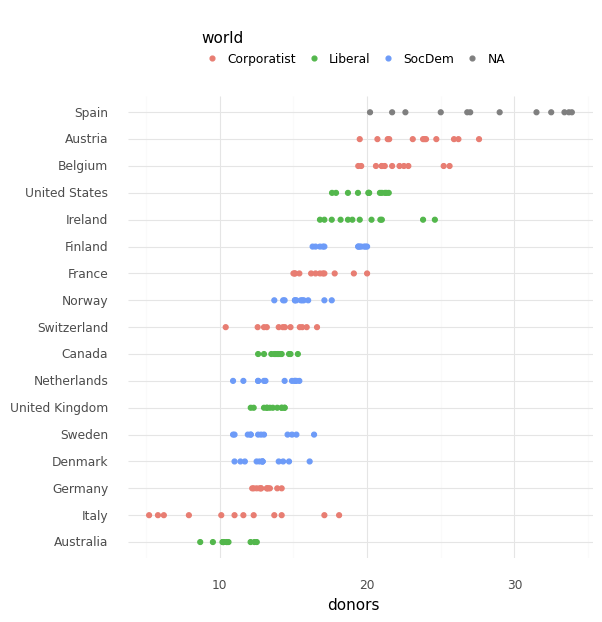

<ggplot: (320634435)>

In [14]:
# 5.10

p = ggplot(
    data=organdata,
    mapping=aes(x='country', y='donors',color='world')
)

p + geom_point() + \
    labs(x=None) + \
    coord_flip() + \
    theme_minimal() + \
    theme(legend_position='top') + \
    scale_color_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY]
    )

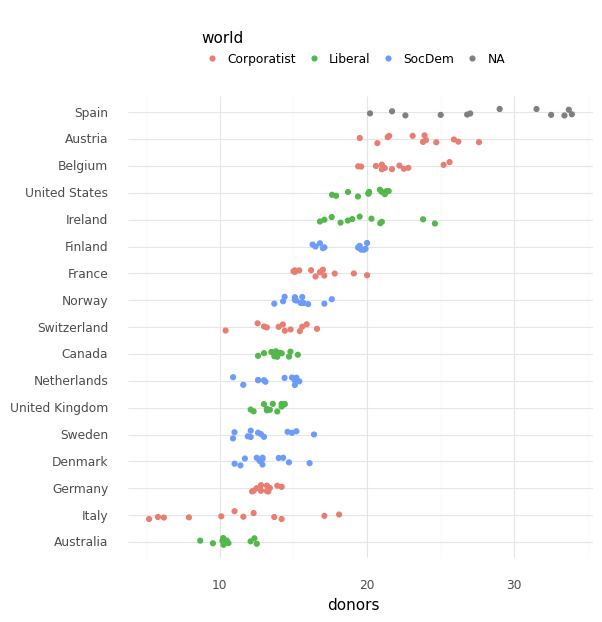

<ggplot: (320819938)>

In [15]:
# 5.12

p = ggplot(
    data=organdata,
    mapping=aes(x='country', y='donors',color='world')
)

p + geom_jitter(position=position_jitter(width=0.15)) + \
    labs(x=None) + \
    coord_flip() + \
    theme_minimal() + \
    theme(legend_position='top') + \
    scale_color_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY]
    )

## Summarize the data by country

In [16]:
by_country = organdata.groupby(
    ['country','consent_law']
).agg(['mean','std']).reset_index()

by_country = by_country.dropna()

by_country.columns = ['_'.join(y) if y[1] != '' else y[0] for y in by_country.columns]

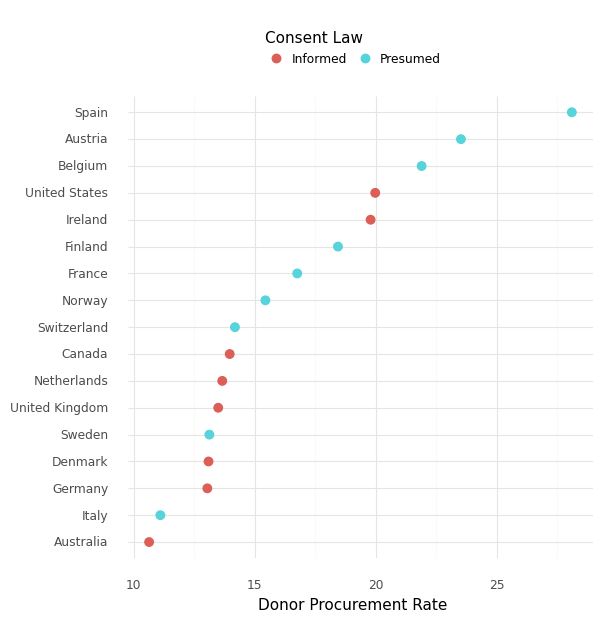

<ggplot: (320834058)>

In [17]:
# 5.13

p = ggplot(
    data=by_country,
    mapping=aes(
        x='donors_mean',
        y='country',
        color='consent_law'
    )
) 

p + geom_point(size=3) + \
    theme_minimal() + \
    theme(legend_position="top") + \
    labs(x="Donor Procurement Rate", y="",color="Consent Law")

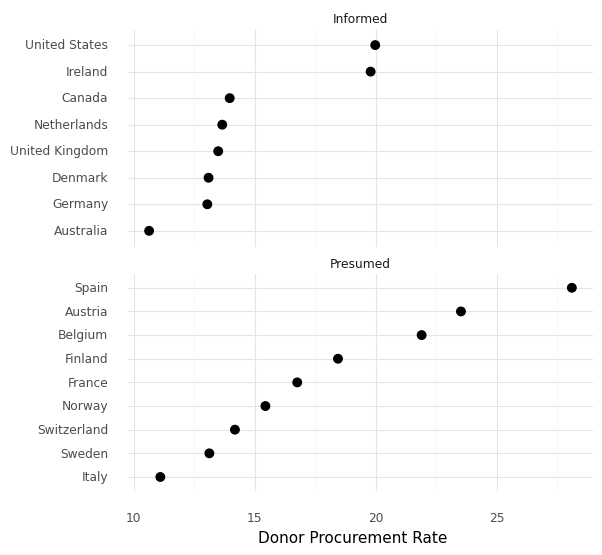

<ggplot: (321123581)>

In [18]:
# 5.14

p = ggplot(
    data=by_country,
    mapping=aes(
        x='donors_mean',
        y='country',
    )
) 

p + geom_point(size=3) + \
    facet_wrap('~consent_law',scales='free_y',ncol=1) + \
    theme_minimal() + \
    labs(x="Donor Procurement Rate", y = "")

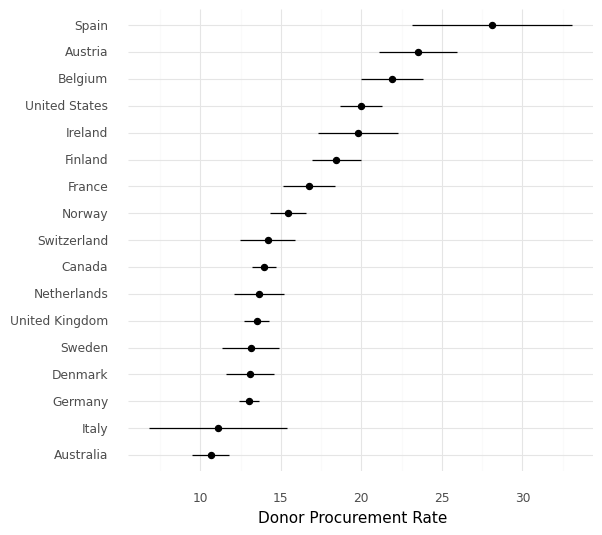

<ggplot: (321124729)>

In [19]:
# 5.15

p = ggplot(
    data=by_country,
    mapping=aes(
       x='country',
       y='donors_mean'
    )
)

p + geom_pointrange(mapping=aes(
    ymin='donors_mean - donors_std',ymax='donors_mean + donors_std')
) + labs(x='',y='Donor Procurement Rate') + theme_minimal() + coord_flip()

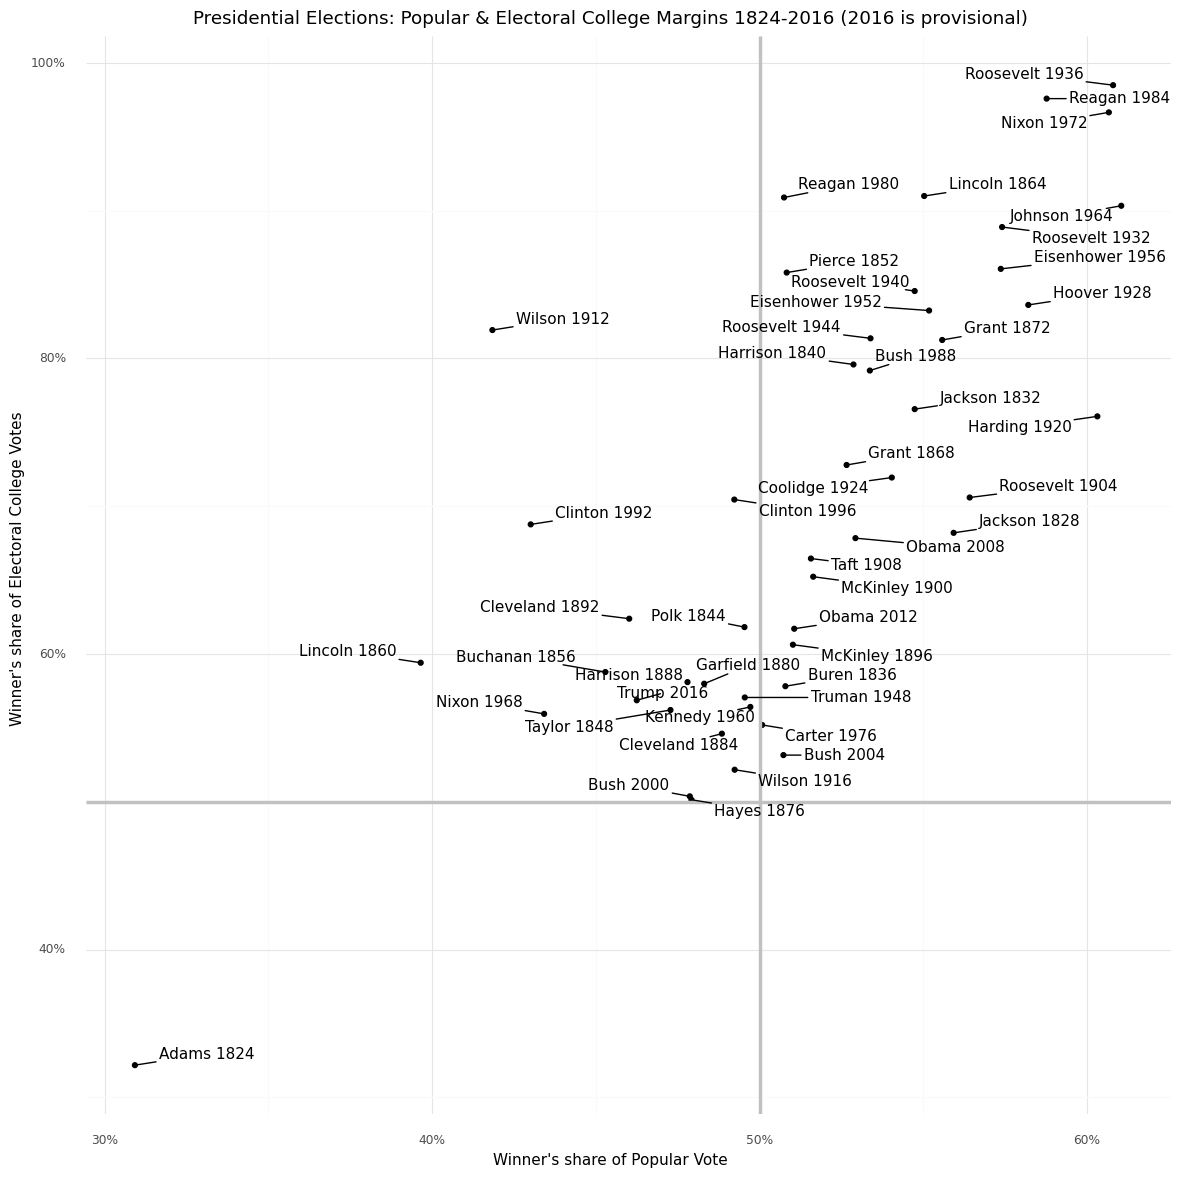

<ggplot: (320825188)>

In [20]:
# 5.18

# NOTE(jkg): Can't figure out exact spread of labes but this seems acceptable
# ! pip install adjustText

plotnine.options.figure_size = (14, 14)

elections_historic = pd.read_feather('data/elections_historic.f')
t  = 'Presidential Elections: Popular & Electoral College Margins 1824-2016 (2016 is provisional)'
xt = "Winner's share of Popular Vote"
yt = "Winner's share of Electoral College Votes"

p = ggplot(elections_historic, aes(x='popular_pct',y='ec_pct',label='winner_label'))
p + geom_point() + \
    geom_hline(yintercept=0.5,size=1.4,color='#c1c1c1') + \
    geom_vline(xintercept=0.5,size=1.4,color='#c1c1c1') + \
    geom_text(adjust_text = {
        'expand_points': (1.5, 1.5),
        'arrowprops': {
            'arrowstyle': '-',
            'color': 'black'
        }
    }) + \
    theme_minimal() + \
    scale_x_continuous(labels=lambda x:['{:.0%}'.format(y) for y in x]) + \
    scale_y_continuous(labels=lambda x:['{:.0%}'.format(y) for y in x]) + \
    labs(x=xt,y=yt,title=t)

In [21]:
# NOTE(jkg): it looks like plots 5.19-5.20 are impossible with adjustText. Maybe look into if we can change that.

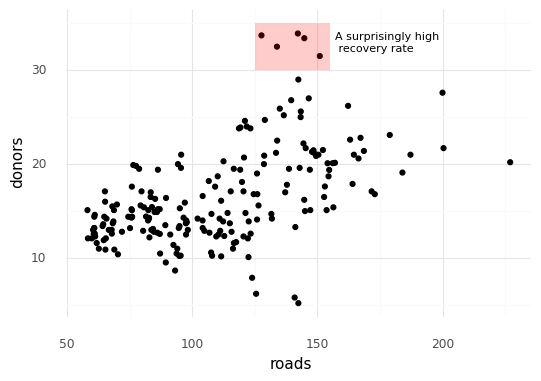

<ggplot: (321155413)>

In [22]:
# 5.22
plotnine.options.figure_size = (6, 4)

p = ggplot(data=organdata,
           mapping=aes(x='roads',y='donors'))
p + geom_point() + \
    annotate(geom='rect',xmin=125,xmax=155,ymin=30,ymax=35,fill="red",alpha=0.2) + \
    annotate(geom='text',x=157,y=33,label="A surprisingly high \n recovery rate",hjust='left',size=8) +\
    theme_minimal()

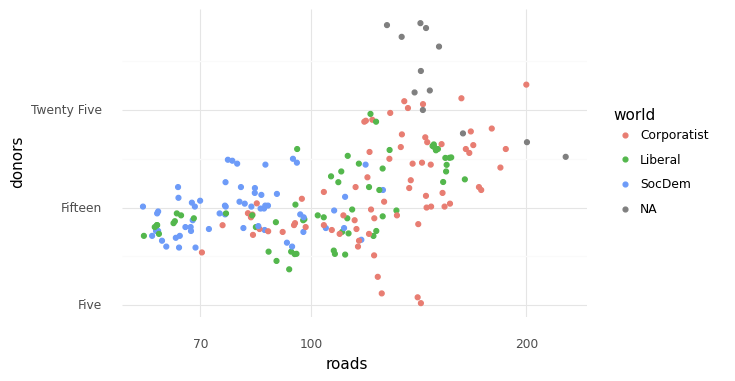

<ggplot: (321482009)>

In [23]:
# 5.25

# TODO(jkg): improve minor breaks here

p = ggplot(
    data=organdata,
    mapping=aes(x='roads',y='donors',color='world')
)

p + geom_point() + \
    scale_x_log10(minor_breaks=[]) + \
    scale_y_continuous(breaks=[5,15,25],labels=["Five","Fifteen",'Twenty Five']) + \
    theme_minimal() + \
    scale_color_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY]
    )

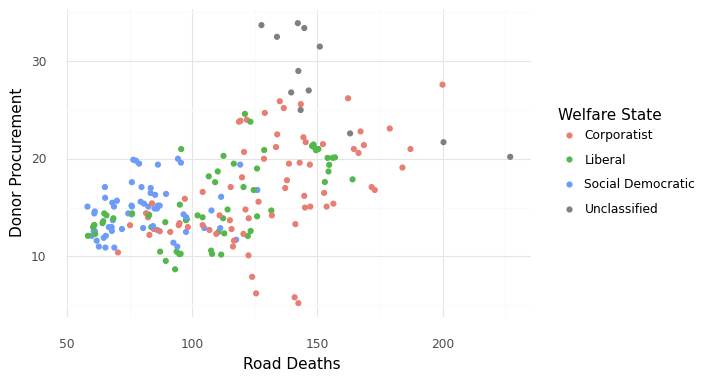

<ggplot: (321140616)>

In [24]:
# 5.26
p = ggplot(
    data=organdata,
    mapping=aes(x='roads',y='donors',color='world')
)

p + geom_point() + \
    scale_color_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY],
        labels = [
            'Corporatist',
            'Liberal',
            'Social Democratic',
            'Unclassified'
        ]
    ) + \
    labs(x="Road Deaths",y="Donor Procurement", color="Welfare State") + theme_minimal()

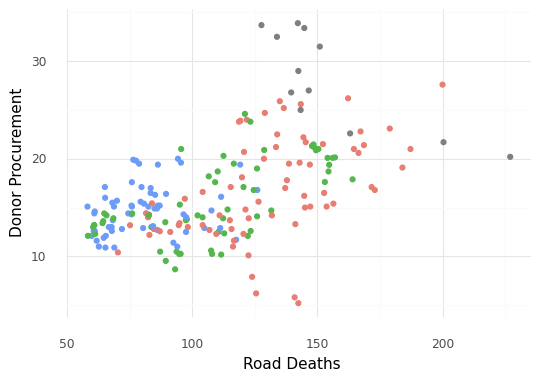

<ggplot: (314338847)>

In [25]:
# 5.27
p = ggplot(
    data=organdata,
    mapping=aes(x='roads',y='donors',color='world')
)

p + geom_point() + \
    scale_color_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY],
    ) + guides(color=False) + \
    labs(x="Road Deaths",y="Donor Procurement", color="Welfare State") + theme_minimal()